In [1]:
import pandas as pd

# Dataframe creation

In [2]:
data = pd.read_csv('/Users/mikel/Documents/Projects/chameleon-pricing/twb_data.csv', sep=",", skiprows=3)

In [3]:
data=data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 65'])

In [4]:
data=pd.DataFrame(data.T)

In [5]:
indice = data.index[1:]

In [6]:
aux = pd.DataFrame(data.iloc[0])

In [7]:
final = pd.DataFrame(data = data.iloc[1:], index = indice, columns= list(aux['Country Name']))

In [8]:
last = data.iloc[1:]

In [9]:
df=last.rename(columns=dict(data.iloc[0]))

In [10]:
#Quitamos todas aquellas columnas y filas con full nulls
df=df.dropna(axis = 0, how = 'all')
df=df.dropna(axis = 1, how = 'all')

In [11]:
#fill old null values with first occurrence
df=df.fillna(method='backfill')

In [12]:
df.Spain

1990    0.619435
1991    0.640726
1992    0.668489
1993    0.682646
1994    0.694306
1995    0.713594
1996    0.724042
1997    0.723932
1998    0.723853
1999    0.739210
2000    0.739549
2001    0.747416
2002    0.742312
2003    0.760047
2004    0.766530
2005    0.769508
2006    0.736983
2007    0.733300
2008    0.725862
2009    0.718152
2010    0.726370
2011    0.714129
2012    0.694976
2013    0.674800
2014    0.662359
2015    0.664740
2016    0.642644
2017    0.630839
2018    0.631944
2019    0.626031
2020    0.624484
Name: Spain, dtype: float64

# Time series

In [13]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pylab as plt

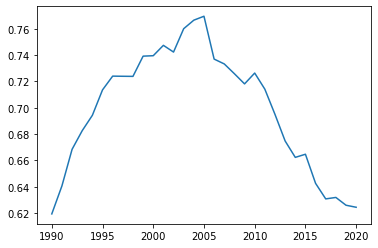

In [14]:
%matplotlib inline

df.Spain.plot();

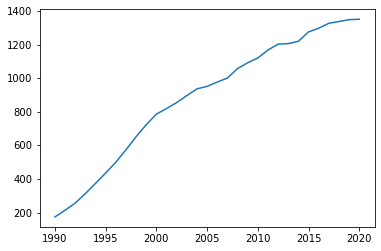

In [15]:
df.Colombia.plot();

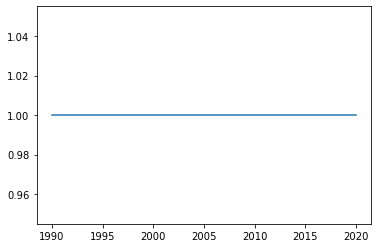

In [16]:
df['United States'].plot();

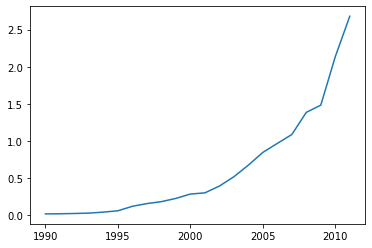

In [17]:
df['Venezuela, RB'].plot();

In [18]:
#arma 1 1 

# Fill null values

In [19]:
df=df.fillna(method='backfill')

In [20]:
df.index = pd.to_numeric(df.index, errors='coerce')

In [21]:
for i in df:
    df[i]=df[i].interpolate(method="spline", order=1)

# Modeling

In [22]:
# ARMA order==> p=>AR(n, maxlag), q=MA(m, ancho de la ventana)

from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error as mse

In [23]:
db = df.reset_index()

In [24]:
db['index'] =  pd.to_datetime(db['index'], format='%Y')

In [25]:
db=db.set_index('index')

In [26]:
train, test = db.Spain[:-4], db.Spain[-4:]

In [27]:
model=ARMA(train, order = (1, 1)).fit(disp=False)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [28]:
pred=model.predict(len(train), len(db.Spain)-1)

In [29]:
pred

2017-01-01    0.636340
2018-01-01    0.637718
2019-01-01    0.639021
2020-01-01    0.640253
Freq: AS-JAN, dtype: float64

In [30]:
mse(model.predict(len(train), len(db.Spain)-1), test)**0.5

0.010965728888099387

In [31]:
pred=model.predict(len(train), len(db.Spain)-1)
error=(pred-test).abs().sum()/len(pred)
print('Error mae: ', error.round(5))
res=pd.DataFrame({'real': test, 'pred': pred, 'diff':pred-test})
res

Error mae:  0.01001


real      pred      diff
2017-01-01  0.630839  0.636340  0.005501
2018-01-01  0.631944  0.637718  0.005774
2019-01-01  0.626031  0.639021  0.012990
2020-01-01  0.624484  0.640253  0.015769

In [32]:
train, test = db.Spain[:-4], db.Spain[-4:]

In [33]:
model=ARMA(train, order = (1, 1)).fit(disp=False)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [34]:
pred=model.predict(len(train), len(db.Spain)-1)

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [36]:
db=db.append(pd.Series(name='2021-01-01 00:00:00'))
db=db.append(pd.Series(name='2022-01-01 00:00:00'))
db=db.append(pd.Series(name='2023-01-01 00:00:00'))

In [37]:
import warnings 
warnings.simplefilter('ignore')
for j in db:
        train, test = db[j][:-3], db[j][-3:]
        model=SARIMAX(train, order = (1, 1, 1)).fit(disp=False)
        pred=model.predict(len(train), len(db[j])-1)
        db[j].iloc[-3]=pred[2]
        db[j].iloc[-2]=pred[1]
        db[j].iloc[-1]=pred[0]

In [38]:
db

Aruba  Afghanistan        Angola    Albania  \
index                                                                 
1990-01-01 00:00:00  0.945131     9.190297  1.058393e-08   2.338549   
1991-01-01 00:00:00  0.965522     9.190297  2.112144e-08   3.065402   
1992-01-01 00:00:00  0.979811     9.190297  1.190553e-07   9.979887   
1993-01-01 00:00:00  1.007829     9.190297  1.183680e-06  21.998489   
1994-01-01 00:00:00  1.048954     9.190297  2.637706e-05  29.258513   
1995-01-01 00:00:00  1.062042     9.190297  4.974581e-04  31.477205   
1996-01-01 00:00:00  1.077156     9.190297  2.393975e-02  35.424557   
1997-01-01 00:00:00  1.098135     9.190297  4.599778e-02  38.738167   
1998-01-01 00:00:00  1.157248     9.190297  6.338876e-02  40.720081   
1999-01-01 00:00:00  1.165873     9.190297  4.108499e-01  41.101613   
2000-01-01 00:00:00  1.152334     9.190297  2.081744e+00  42.007008   
2001-01-01 00:00:00  1.191074     9.190297  4.203521e+00  42.805580   
2002-01-01 00:00:00  1.225614     9.190297  1.003391e+01  42.926308   
2003-01-01 00:00:00  1.228514    10.074357  1.910367e+01  44.638939   
2004-01-01 00:00:00  1.222278    10.916000  2.482367e+01  44.935977   
2005-01-01 00:00:00  1.224860    11.741497  3.427519e+01  45.527277   
2006-01-01 00:00:00  1.223898    12.217140  3.896334e+01  44.471646   
2007-01-01 00:00:00  1.262796    14.577788  3.957884e+01  44.689059   
2008-01-01 00:00:00  1.301539    14.599403  4.634378e+01  44.561269   
2009-01-01 00:00:00  1.314000    14.175492  3.828420e+01  44.305546   
2010-01-01 00:00:00  1.290071    14.546728  5.005276e+01  44.162356   
2011-01-01 00:00:00  1.302941    16.613478  6.460575e+01  43.857834   
2012-01-01 00:00:00  1.317801    17.242264  6.568167e+01  43.655000   
2013-01-01 00:00:00  1.285141    17.509419  6.601937e+01  44.113709   
2014-01-01 00:00:00  1.308843    17.035878  6.500067e+01  42.893807   
2015-01-01 00:00:00  1.362318    17.022520  6.818204e+01  42.705831   
2016-01-01 00:00:00  1.355045    17.445828  8.077897e+01  42.385879   
2017-01-01 00:00:00  1.350690    17.205558  9.295172e+01  42.255535   
2018-01-01 00:00:00  1.409705    17.144309  1.171161e+02  42.125796   
2019-01-01 00:00:00  1.424593    17.914483  1.461672e+02  41.342391   
2020-01-01 00:00:00  1.439480    18.927627  1.747138e+02  41.497269   
2021-01-01 00:00:00  1.455043    19.393423  2.481395e+02  42.474337   
2022-01-01 00:00:00  1.452454    19.372971  2.252264e+02  42.308328   
2023-01-01 00:00:00  1.459687    19.287213  2.007851e+02  42.015124   

                     United Arab Emirates  Argentina     Armenia  \
index                                                              
1990-01-01 00:00:00              1.167017   0.293643    0.005126   
1991-01-01 00:00:00              1.137996   0.683117    0.008895   
1992-01-01 00:00:00              1.132743   0.775240    0.058162   
1993-01-01 00:00:00              1.120668   0.730329    0.847218   
1994-01-01 00:00:00              1.094358   0.735435   34.899729   
1995-01-01 00:00:00              1.113766   0.743130   89.273584   
1996-01-01 00:00:00              1.156881   0.729385  104.844131   
1997-01-01 00:00:00              1.126440   0.713695  121.346788   
1998-01-01 00:00:00              1.066513   0.693716  132.833997   
1999-01-01 00:00:00              1.140101   0.671284  131.013884   
2000-01-01 00:00:00              1.242966   0.663416  126.388789   
2001-01-01 00:00:00              1.187713   0.642064  128.657681   
2002-01-01 00:00:00              1.213308   0.825195  129.640057   
2003-01-01 00:00:00              1.239697   0.895181  133.129239   
2004-01-01 00:00:00              1.309825   1.031788  137.778591   
2005-01-01 00:00:00              1.480184   1.103858  137.903943   
2006-01-01 00:00:00              1.608567   1.218661  140.034630   
2007-01-01 00:00:00              1.762830   1.364085  142.205111   
2008-01-01 00:00:00              2.049673   1.648101  147.846760   
2009-01-01 00:00:00              1.7253

# Adapt data and add currency codes

In [39]:
forecast=db.T

In [40]:
forecast

index                 1990-01-01 00:00:00  1991-01-01 00:00:00  \
Aruba                        9.451314e-01         9.655218e-01   
Afghanistan                  9.190297e+00         9.190297e+00   
Angola                       1.058393e-08         2.112144e-08   
Albania                      2.338549e+00         3.065402e+00   
United Arab Emirates         1.167017e+00         1.137996e+00   
...                                   ...                  ...   
Kosovo                       3.305701e-01         3.305701e-01   
Yemen, Rep.                  6.107839e+00         6.616785e+00   
South Africa                 1.265262e+00         1.415433e+00   
Zambia                       9.556399e-03         1.780860e-02   
Zimbabwe                     7.439981e-01         6.708873e-01   

index                 1992-01-01 00:00:00  1993-01-01 00:00:00  \
Aruba                        9.798110e-01             1.007829   
Afghanistan                  9.190297e+00             9.190297   
Angola                       1.190553e-07             0.000001   
Albania                      9.979887e+00            21.998489   
United Arab Emirates         1.132743e+00             1.120668   
...                                   ...                  ...   
Kosovo                       3.305701e-01             0.330570   
Yemen, Rep.                  7.321481e+00             8.323239   
South Africa                 1.585498e+00             1.749861   
Zambia                       4.623424e-02             0.110046   
Zimbabwe                     5.632571e-01             0.529361   

index                 1994-01-01 00:00:00  1995-01-01 00:00:00  \
Aruba                            1.048954             1.062042   
Afghanistan                      9.190297             9.190297   
Angola                           0.000026             0.000497   
Albania                         29.258513            31.477205   
United Arab Emirates             1.094358             1.113766   
...                                   ...                  ...   
Kosovo                           0.330570             0.330570   
Yemen, Rep.                      9.842986            14.050874   
South Africa                     1.877083             2.026311   
Zambia                           0.194742             0.249130   
Zimbabwe                         0.498103             0.502697   

index                 1996-01-01 00:00:00  1997-01-01 00:00:00  \
Aruba                            1.077156             1.098135   
Afghanistan                      9.190297             9.190297   
Angola                           0.023940             0.045998   
Albania                         35.424557            38.738167   
United Arab Emirates             1.156881             1.126440   
...                                   ...                  ...   
Kosovo                           0.330570             0.330570   
Yemen, Rep.                     18.871843            21.016099   
South Africa                     2.147189             2.279385   
Zambia                           0.304221             0.375034   
Zimbabwe                         0.538010             0.513663   

index                 1998-01-01 00:00:00  1999-01-01 00:00:00  ...  \
Aruba                            1.157248             1.165873  ...   
Afghanistan                      9.190297             9.190297  ...   
Angola                           0.063389             0.410850  ...   
Albania                         40.720081            41.101613  ...   
United Arab Emirates             1.066513             1.140101  ...   
...                                   ...                  ...  ...   
Kosovo                           0.330570             0.330570  ...   
Yemen, Rep.                     19.049449            25.062039  ...   
South Africa                     2.429536             2.563279  ...   
Zambia                           0.433561             0.503995  ...   
Zimbabwe                         0.370553      

In [41]:
forecast['Country'] = forecast.index

In [42]:
forecast

index                 1990-01-01 00:00:00  1991-01-01 00:00:00  \
Aruba                        9.451314e-01         9.655218e-01   
Afghanistan                  9.190297e+00         9.190297e+00   
Angola                       1.058393e-08         2.112144e-08   
Albania                      2.338549e+00         3.065402e+00   
United Arab Emirates         1.167017e+00         1.137996e+00   
...                                   ...                  ...   
Kosovo                       3.305701e-01         3.305701e-01   
Yemen, Rep.                  6.107839e+00         6.616785e+00   
South Africa                 1.265262e+00         1.415433e+00   
Zambia                       9.556399e-03         1.780860e-02   
Zimbabwe                     7.439981e-01         6.708873e-01   

index                 1992-01-01 00:00:00  1993-01-01 00:00:00  \
Aruba                        9.798110e-01             1.007829   
Afghanistan                  9.190297e+00             9.190297   
Angola                       1.190553e-07             0.000001   
Albania                      9.979887e+00            21.998489   
United Arab Emirates         1.132743e+00             1.120668   
...                                   ...                  ...   
Kosovo                       3.305701e-01             0.330570   
Yemen, Rep.                  7.321481e+00             8.323239   
South Africa                 1.585498e+00             1.749861   
Zambia                       4.623424e-02             0.110046   
Zimbabwe                     5.632571e-01             0.529361   

index                 1994-01-01 00:00:00  1995-01-01 00:00:00  \
Aruba                            1.048954             1.062042   
Afghanistan                      9.190297             9.190297   
Angola                           0.000026             0.000497   
Albania                         29.258513            31.477205   
United Arab Emirates             1.094358             1.113766   
...                                   ...                  ...   
Kosovo                           0.330570             0.330570   
Yemen, Rep.                      9.842986            14.050874   
South Africa                     1.877083             2.026311   
Zambia                           0.194742             0.249130   
Zimbabwe                         0.498103             0.502697   

index                 1996-01-01 00:00:00  1997-01-01 00:00:00  \
Aruba                            1.077156             1.098135   
Afghanistan                      9.190297             9.190297   
Angola                           0.023940             0.045998   
Albania                         35.424557            38.738167   
United Arab Emirates             1.156881             1.126440   
...                                   ...                  ...   
Kosovo                           0.330570             0.330570   
Yemen, Rep.                     18.871843            21.016099   
South Africa                     2.147189             2.279385   
Zambia                           0.304221             0.375034   
Zimbabwe                         0.538010             0.513663   

index                 1998-01-01 00:00:00  1999-01-01 00:00:00  ...  \
Aruba                            1.157248             1.165873  ...   
Afghanistan                      9.190297             9.190297  ...   
Angola                           0.063389             0.410850  ...   
Albania                         40.720081            41.101613  ...   
United Arab Emirates             1.066513             1.140101  ...   
...                                   ...                  ...  ...   
Kosovo                           0.330570             0.330570  ...   
Yemen, Rep.                     19.049449            25.062039  ...   
South Africa                     2.429536             2.563279  ...   
Zambia                           0.433561             0.503995  ...   
Zimbabwe                         0.370553      

In [43]:
currency=pd.read_html('https://docs.1010data.com/1010dataReferenceManual/DataTypesAndFormats/currencyUnitCodes.html')
currency=currency[0]
currency['Entity']=currency['Entity'].str.lower()
forecast['Country']=forecast['Country'].str.lower()

In [44]:
currency

Entity                                           Currency Code  \
0         afghanistan                                            Afghani  AFN   
1       åland islands                                               Euro  EUR   
2             albania                                                Lek  ALL   
3             algeria                                     Algerian Dinar  DZD   
4      american samoa                                          US Dollar  USD   
..                ...                                                ...  ...   
273  zz07_no_currency  The codes assigned for transactions where no c...  XXX   
274         zz08_gold                                               Gold  XAU   
275    zz09_palladium                                          Palladium  XPD   
276     zz10_platinum                                           Platinum  XPT   
277       zz11_silver                                             Silver  XAG   

    Minor Unit  
0            2  
1            2  
2            2  
3            2  
4            2  
..         ...  
273       N.A.  
274       N.A.  
275       N.A.  
276       N.A.  
277       N.A.  

[278 rows x 4 columns]

In [45]:
forecast_currency=forecast.merge(currency, left_on='Country', right_on='Entity')

In [46]:
forecast_currency=forecast_currency.drop(columns=['Minor Unit'])

In [47]:
forecast_currency.to_csv('/Users/mikel/Documents/Projects/chameleon-pricing/forecast_currency.csv', index=False)

# Model testing

In [48]:
train, test = db.Spain[:-3], db.Spain[-3:]
model=SARIMAX(train, order = (1, 1, 1)).fit(disp=False)
pred=model.predict(len(train), len(db.Spain)-1)
pred

2021-01-01    0.621920
2022-01-01    0.619767
2023-01-01    0.617959
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [49]:
mse(model.predict(len(train), len(db.Spain)-1), test)**0.5

0.0032348510487381983

In [50]:
pred=model.predict(len(train), len(db.Spain)-1)
error=(pred-test).abs().sum()/len(pred)
print('Error mae: ', error.round(5))
res=pd.DataFrame({'real': test, 'pred': pred, 'diff':pred-test})
res

Error mae:  0.00264


real      pred      diff
2021-01-01 00:00:00       NaN  0.621920  0.003962
2022-01-01 00:00:00       NaN  0.619767  0.000000
2023-01-01 00:00:00       NaN  0.617959 -0.003962
2021-01-01 00:00:00  0.617959       NaN       NaN
2022-01-01 00:00:00  0.619767       NaN       NaN
2023-01-01 00:00:00  0.621920       NaN       NaN